## Classifying Online Shopper Intention







**The Data:**
The data set is a set of 18 features: 10 numerical and 8 categorical. This dataset has 12330 entries, split into 10,422 entries where the shoppers did not purchase and 1908 entries where the shoppers did purchase. Each entry is based on unique users in a 1-year period to avoid any trends specific to a specific campaign. 


In [1]:


# Import packages

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  confusion_matrix

# Read data and display data head

shopping = pd.read_csv('CLASSIFIERDATA.csv')
shopping.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
shopping.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates in %', 'ExitRates in %', 'PageValues',
       'SpecialDay (probability)', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

## Exploratory Data Analysis

In [3]:
# Describe the dataset
shopping.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [4]:
# Check for null values in data
nullcount = shopping.isnull().sum()
print('Total number of null values in dataset:', nullcount.sum())

Total number of null values in dataset: 0


Here we can see that there are no null values in the dataset. 
We do not need to fix or replace any null values in the dataset.

In [5]:
# Checking for number of unique values for each feature

uniques = shopping.nunique(axis=0)
print(uniques)

Administrative                27
Administrative_Duration     3335
Informational                 17
Informational_Duration      1258
ProductRelated               311
ProductRelated_Duration     9551
BounceRates in %            1872
ExitRates in %              4777
PageValues                  2704
SpecialDay (probability)       6
Month                         10
OperatingSystems               8
Browser                       13
Region                         9
TrafficType                   20
VisitorType                    3
Weekend                        2
Revenue                        2
dtype: int64


In [6]:
shopping['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

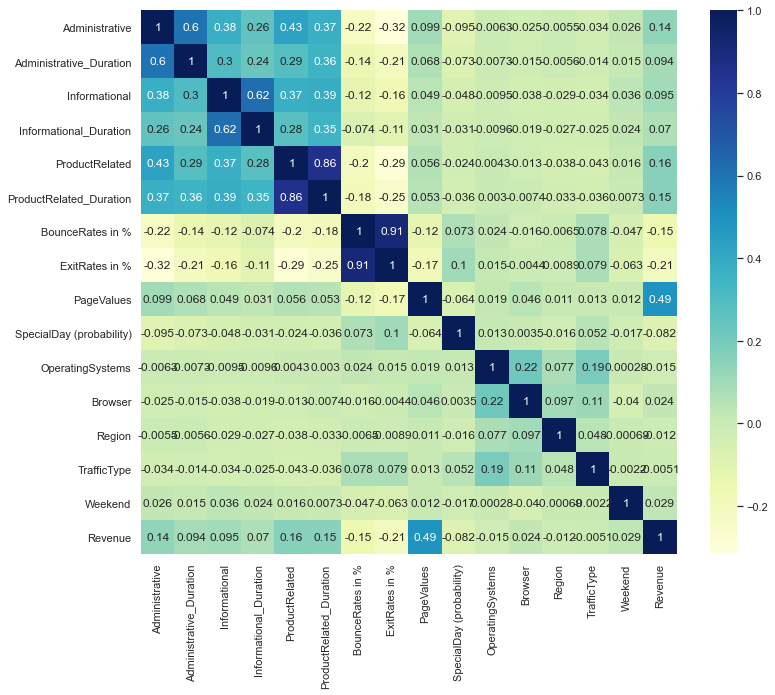

In [7]:
#finding correlation
sns.set(rc={"figure.figsize":(12,10)})
sns.heatmap(data=shopping.corr(),cmap="YlGnBu",annot=True)

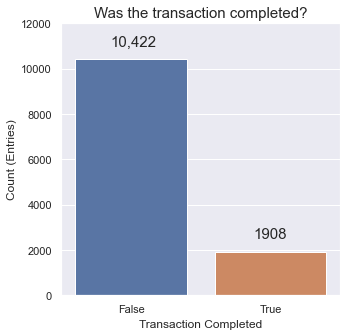

In [8]:
# Visualize the data
sns.set(rc={"figure.figsize":(5,5)})
sns.countplot(shopping['Revenue'])
plt.ylim(0,12000)
plt.title('Was the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.text(x=-.15200, y=11000 ,s='10,422', fontsize=15)
plt.text(x=.875, y=2500, s='1908', fontsize=15)
plt.show()


We can see that the number of entries where the customer ended up not purchasing is much higher that the number of entries where the customer ended up completing a transaction. This makes sense, as a majority of normal online shopping ends without a purchase.

## Feature Cleaning

We will try classification prior to any feature engineering to see a baseline classification based on our features. In order to prepare our data, we need to switch our labels to the correct format. We have a few features that need to be adjusted.

First, we drop the month column. The 'Month' column only has 10 unique types, which indicates that it is missing two month's of data. Each month has varying numbers of entries, which could unfairly bias our data to prefer classification by month. We can see below the distribution of each month in the 'Month' column. Additionally, time-sensitivity is already contained in the 'SpecialDay' column, which influences buying decision, so the month column is slightly redundant.

In [9]:
monthly = shopping['Month'].value_counts()
monthly

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

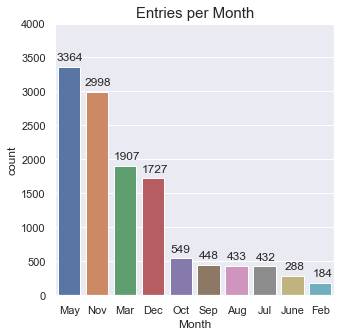

In [10]:

sns.set(rc={"figure.figsize":(5,5)})
sns.countplot(shopping['Month'], order=monthly.index)
plt.title('Entries per Month', fontsize=15)
xval = -.45
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+90, s=str(value))
    xval += 1.02

We can see here that the 'Month' column is missing January and April. We can see visually that several months have many samples (May, Nov) and a couple have very few samples (Feb, June). We will remove this column.

Next, let us take a look at the 'OperatingSystems' and 'Browser' columns.

In [11]:
shopping['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

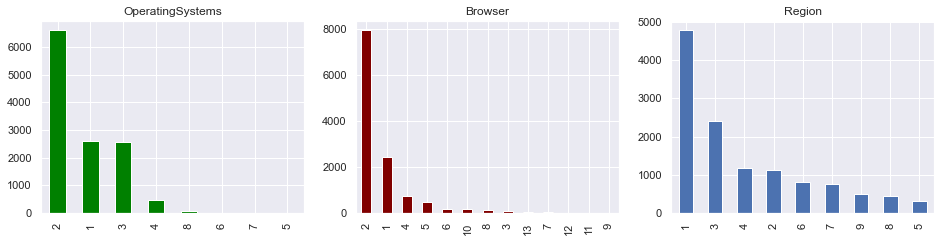

In [12]:
# Independed variable [caterogical]
plt.figure(1)
plt.subplot(331) 
shopping['OperatingSystems'].value_counts().plot.bar(figsize=(16,12), title= 'OperatingSystems', color=['green'])
plt.subplot(332) 
shopping['Browser'].value_counts().plot.bar(title= 'Browser', color='maroon')

plt.subplot(333)
shopping['Region'].value_counts().plot.bar(title= 'Region') 

plt.show()

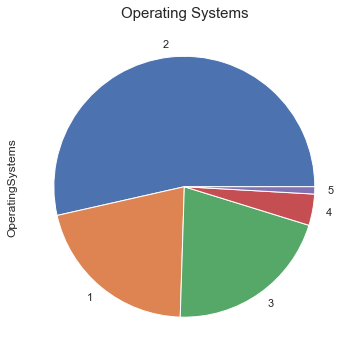

In [13]:
shopping['OperatingSystems'] = shopping['OperatingSystems'].replace([5,6,7,8],5)
os_plot = shopping['OperatingSystems'].value_counts().plot.pie(figsize=(6,6))
plt.title('Operating Systems', fontsize=15)
plt.show()

Here we have the Operating Systems, labeled by number. Low-usage browsers have been consolidated into label '5'.
We can see that a majority of users use operating system \#2. Operating systems can indicate users of a specific type of computer and may portray certain user archetypes (Windows users, Mac users, Linux users). For now, we will forgo usage of this column for our classifier.

Browser choice is even more polarizing than Operating System. Here we see that a large majority of users use browser 2, with a smaller number of users using browser 1. All other browsers represent a small subsection of online users. We will not use this as it does not contribute much to our model.

There are several other columns that we leave out:

'Region': We leave regionality out because the regionality may be slightly tied to purchase likelihood, but we want to train our model on a smaller set of features if possible.

'TrafficType': We leave this column out because Traffic sources are not quite useful for classifying if a user will make a purchase. It usually aids website owners in gauging traffic sources and can assist with determining where they should invest in advertisement.

'Weekend':There is weak correlation between days of the week and online shopping.

In [14]:
# Removing unneccessary columns from data: shopping_clean

shopping_clean = shopping.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

## Label and One Hot Encoding

In order to properly fit our classifier, we will need to encode our string variables to integer labels, then convert our labels from integers to One Hot columns .

In [15]:
#Approch-1 (without balancing the class)
# Encoding Vistor Type

visitor_encoded = pd.get_dummies(shopping_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)

visitor_encoded

,Visitor_Type_Other,Visitor_Type_Returning_Visitor
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
12325,0,1
12326,0,1
12327,0,1
12328,0,1


In [16]:
shopping_clean_merged = pd.concat([shopping_clean, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)
shopping_clean_merged

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Revenue,Visitor_Type_Other,Visitor_Type_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,False,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,False,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,False,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,False,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,False,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,False,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,False,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,False,0,1


In [17]:
# Split train and test data

X = shopping_clean_merged.drop('Revenue', axis=1)
y = shopping_clean_merged['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=.2)

            Method Used  Accuracy
0   Logistic Regression  0.883212
1         Decision Tree  0.860097
2     RandomForest Gini  0.899838
3  RandomForest Entropy  0.900649
4        Support Vector  0.861719
5   K Nearest Neighbors  0.873885
6            GuassionNB  0.846310
7           BernoulliNB  0.848337
8     Voting Classifier  0.892539


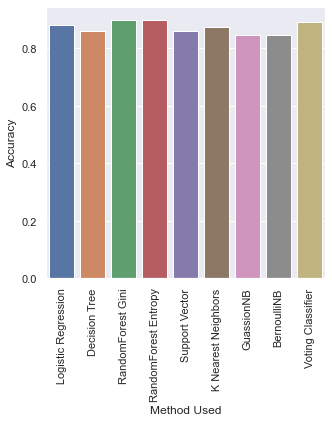

In [18]:
list_met = []
list_accuracy = []

# Model 1
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')
lr = classifier.fit(X_train, y_train)
# Prediction
y_pred = classifier.predict(X_test)
# Accuarcy
accuracy_LR = accuracy_score(y_test, y_pred)

# Model 2
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(random_state=14)
dt = classifier2.fit(X_train, y_train)
# prediction
y_pred2 = classifier2.predict(X_test)
# evaluation
accuracy_DT = accuracy_score(y_test, y_pred2)

# Model 3 
# criteria - gini
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(random_state=14)
rfi = classifier3.fit(X_train, y_train)
#prediction
y_pred3 = classifier3.predict(X_test)
# evaluation
accuracy_RFI = accuracy_score(y_test, y_pred3)

# Model 4
classifier4 = RandomForestClassifier(criterion='entropy', random_state=14)
rfe = classifier4.fit(X_train, y_train)
# predict
y_pred4 = classifier4.predict(X_test)
# evaluation
accuracy_RFE = accuracy_score(y_test, y_pred4)

# Model 5
from sklearn.svm import SVC

model_svm = SVC()
SVM = model_svm.fit(X_train, y_train)
#prediction
y_pred5 = model_svm.predict(X_test)
# evaluation
accuracy_SVC = accuracy_score(y_test, y_pred5)

# Model 6
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
knn = model_knn.fit(X_train, y_train)
#prediction
pred_knn = model_knn.predict(X_test)
# evaluation
accuracy_knn = accuracy_score(y_test, pred_knn)

# model 7
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
# prediction
pred_gnb = gnb.predict(X_test)
# evaluation
accuracy_GNB = accuracy_score(y_test, pred_gnb)

# model 8
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
bnb = model.fit(X_train, y_train)
# prediction
pred_bnb = bnb.predict(X_test)
# evaluation
accuracy_BNB = accuracy_score(y_test, pred_bnb)

# combining all the above model by using voting classifier model

from sklearn.ensemble import VotingClassifier

evc = VotingClassifier(estimators = [('lr', lr), ('DT', dt), ('RFI', rfi),('RFE', rfe),
                                     ('SVC', SVM), ('KNN', knn),('GNB', gnb),
                                    ('BNB', bnb)], voting = 'hard',
                                    flatten_transform=True)
model_evc = evc.fit(X_train, y_train)
# prediction
pred_evc = evc.predict(X_test)
# evaluation
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ["Logistic Regression",'Decision Tree','RandomForest Gini', 'RandomForest Entropy',
        'Support Vector','K Nearest Neighbors','GuassionNB','BernoulliNB','Voting Classifier']

list2 = [accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_SVC,accuracy_knn,
        accuracy_GNB,accuracy_BNB, accuracy_evc]

list3 = [classifier,classifier2,classifier3,classifier4,model_svm,model_knn,
        gnb,model,model_evc]

df_accuracy = pd.DataFrame({'Method Used' :list1, "Accuracy" :list2})
print(df_accuracy)

charts = sns.barplot(x='Method Used', y = 'Accuracy', data=df_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
sns.set(rc={"figure.figsize":(5,5)})


In [19]:

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.90      0.97      0.93      2116
        True       0.66      0.36      0.47       350

    accuracy                           0.88      2466
   macro avg       0.78      0.66      0.70      2466
weighted avg       0.87      0.88      0.87      2466

[[2052   64]
 [ 224  126]]


In [20]:
# Fit Random Forest Classifier to our Training Data
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

Random Forest Classifier model accuracy(in %): 90.23


The area under the ROC curve is: 0.89


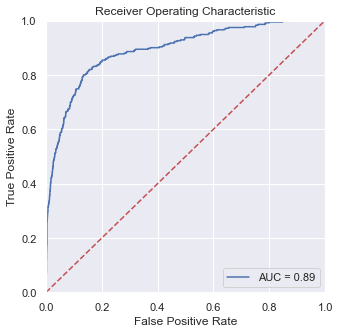

In [21]:
# Calculate ROC AUC for our best performing classifier, the Random Forest Classifier
roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
sns.set(rc={"figure.figsize":(5,5)})

In [22]:
# Calculate Log Loss
rfc_log_loss = log_loss(y_pred_rfc, y_prob_rfc, eps=1e-15)
print('Log Loss:', round(rfc_log_loss,2))

Log Loss: 0.16


##Approch-2 
## Stratifying Training Data 

Because the training data is so heavily skewed in the direction of the 'No purchase made' category, we must stratify our training data so that the ratio of training labels is equal. We use the stratified shuffle split package included in the Sci-kit learn library to achieve this.

In [23]:
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y,stratify=y, test_size=.2, random_state=2, shuffle=True)

            Method Used  Accuracy
0   Logistic Regression  0.878345
1         Decision Tree  0.846715
2     RandomForest Gini  0.888889
3  RandomForest Entropy  0.888078
4        Support Vector  0.848743
5   K Nearest Neighbors  0.858070
6            GuassionNB  0.837794
7           BernoulliNB  0.850365
8     Voting Classifier  0.880373


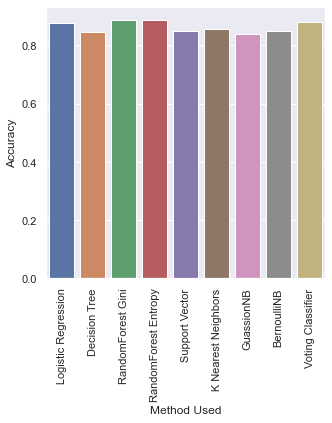

In [24]:
list_met = []
list_accuracy = []

# Model 1
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')
lr = classifier.fit(X_train_stratified, y_train_stratified)
# Prediction
y_pred = classifier.predict(X_test_stratified)
# Accuarcy
accuracy_LR = accuracy_score(y_test_stratified, y_pred)

# Model 2
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(random_state=14)
dt = classifier2.fit(X_train_stratified,y_train_stratified)
# prediction
y_pred2 = classifier2.predict(X_test_stratified)
# evaluation
accuracy_DT = accuracy_score(y_test_stratified, y_pred2)

# Model 3 
# criteria - gini
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(random_state=14)
rfi = classifier3.fit(X_train_stratified, y_train_stratified)
#prediction
y_pred3 = classifier3.predict(X_test_stratified)
# evaluation
accuracy_RFI = accuracy_score(y_test_stratified, y_pred3)

# Model 4
classifier4 = RandomForestClassifier(criterion='entropy', random_state=14)
rfe = classifier4.fit(X_train_stratified, y_train_stratified)
# predict
y_pred4 = classifier4.predict(X_test_stratified)
# evaluation
accuracy_RFE = accuracy_score(y_test_stratified, y_pred4)

# Model 5
from sklearn.svm import SVC

model_svm = SVC()
SVM = model_svm.fit(X_train_stratified, y_train_stratified)
#prediction
y_pred5 = model_svm.predict(X_test_stratified)
# evaluation
accuracy_SVC = accuracy_score(y_test_stratified, y_pred5)

# Model 6
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
knn = model_knn.fit(X_train_stratified,y_train_stratified)
#prediction
pred_knn = model_knn.predict(X_test_stratified)
# evaluation
accuracy_knn = accuracy_score(y_test_stratified, pred_knn)

# model 7
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train_stratified, y_train_stratified)
# prediction
pred_gnb = gnb.predict(X_test_stratified)
# evaluation
accuracy_GNB = accuracy_score(y_test_stratified, pred_gnb)

# model 8
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
bnb = model.fit(X_train_stratified, y_train_stratified)
# prediction
pred_bnb = bnb.predict(X_test_stratified)
# evaluation
accuracy_BNB = accuracy_score(y_test_stratified, pred_bnb)

# combining all the above model by using voting classifier model

from sklearn.ensemble import VotingClassifier

evc = VotingClassifier(estimators = [('lr', lr), ('DT', dt), ('RFI', rfi),('RFE', rfe),
                                     ('SVC', SVM), ('KNN', knn),('GNB', gnb),
                                    ('BNB', bnb)], voting = 'hard',
                                    flatten_transform=True)
model_evc = evc.fit(X_train_stratified,y_train_stratified)
# prediction
pred_evc = evc.predict(X_test_stratified)
# evaluation
accuracy_evc = accuracy_score(y_test_stratified, pred_evc)

list1 = ["Logistic Regression",'Decision Tree','RandomForest Gini', 'RandomForest Entropy',
        'Support Vector','K Nearest Neighbors','GuassionNB','BernoulliNB','Voting Classifier']

list2 = [accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_SVC,accuracy_knn,
        accuracy_GNB,accuracy_BNB, accuracy_evc]

list3 = [classifier,classifier2,classifier3,classifier4,model_svm,model_knn,
        gnb,model,model_evc]

df_accuracy = pd.DataFrame({'Method Used' :list1, "Accuracy" :list2})
print(df_accuracy)

charts = sns.barplot(x='Method Used', y = 'Accuracy', data=df_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
sns.set(rc={"figure.figsize":(5,5)})


In [25]:
# Fit Random Forest Classifier to our Training Data
rfc_stratified = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc_stratified.fit(X_train_stratified, y_train_stratified)

# make prediction using our test data and model
y_pred_rfc_stratified = rfc_stratified.predict(X_test_stratified)
y_prob_rfc_stratified = rfc_stratified.predict_proba(X_test_stratified)[:, 1]

# Comparing our prediciton to response values
print('Stratified Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test_stratified, y_pred_rfc_stratified)*100,2))

Stratified Random Forest Classifier model accuracy(in %): 89.5


The area under the ROC curve for unbalanced data is: 0.89
The area under the ROC curve for stratified data is: 0.9


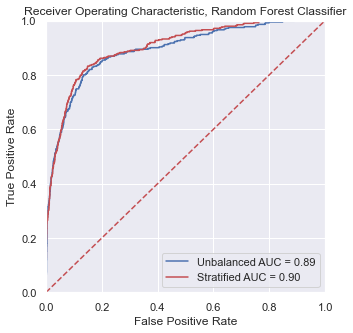

In [26]:
# Let us plot the ROC curve for the Random Forest Classifier for both the stratified data versus the unbalanced data.

roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve for unbalanced data is:', round(roc_value,2))

roc_value_stratified = roc_auc_score(y_test_stratified, y_prob_rfc_stratified)
print('The area under the ROC curve for stratified data is:', round(roc_value_stratified,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

fpr_strat, tpr_strat, threshold_strat = metrics.roc_curve(y_test_stratified, y_prob_rfc_stratified)
roc_auc_strat = metrics.auc(fpr_strat, tpr_strat)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'Unbalanced AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
sns.set(rc={"figure.figsize":(5,5)})

**Feature Importance**

To see if we can improve our model, let us track the feature importance of each of our features to see which features matter to the outcome of the prediction.

In [27]:
# Approch-3 Feature Importance
importances = rfc_stratified.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc_stratified.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train_stratified.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. Feature 8 (0.693368)
2. Feature 7 (0.086168)
3. Feature 5 (0.058875)
4. Feature 6 (0.042850)
5. Feature 4 (0.040776)
6. Feature 1 (0.022842)
7. Feature 0 (0.020969)
8. Feature 11 (0.017604)
9. Feature 3 (0.008162)
10. Feature 2 (0.005109)
11. Feature 9 (0.003008)
12. Feature 10 (0.000269)


In [28]:
# Generating a dataframe for our feature importance

col_names = pd.Series([col for col in X_train_stratified.columns])

importance_df = pd.DataFrame(importances)
importance_df.rename(columns={0:'Importance'}, inplace=True)
importance_df.set_index(col_names,inplace=True)

imp_sorted = importance_df.sort_values(by='Importance', ascending=False)
imp_sorted

,Importance
PageValues,0.693368
ExitRates in %,0.086168
ProductRelated_Duration,0.058875
BounceRates in %,0.042850
ProductRelated,0.040776
Administrative_Duration,0.022842
Administrative,0.020969
Visitor_Type_Returning_Visitor,0.017604
Informational_Duration,0.008162
Informational,0.005109


We can see that the "Page Values" seems to be the most impactful feature by a large margin.

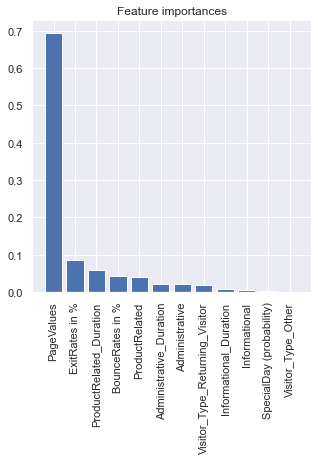

In [29]:
plt.title("Feature importances")
plt.bar(range(X_train_stratified.shape[1]),importances[indices])
plt.xticks(range(X_train_stratified.shape[1]), imp_sorted.index, rotation=90)
plt.xlim([-1, X_train_stratified.shape[1]])
plt.show()
sns.set(rc={"figure.figsize":(5,5)})

Seeing these feature importances, we want to simplify our model to only use features that may heavily contribute to our classification. Using our feature importance chart, we will take the top 5 most impactful features: PageValues, ExitRates, ProductRelated_Duration, BounceRates, ProductRelated. In addition, after creating the simplififed model, we want to measure the effectiveness of our model by using cross validation.

In [30]:

# Creating simple model dataset
simple_model = shopping_clean_merged.drop(['Administrative_Duration','Administrative','Visitor_Type_Returning_Visitor','Informational_Duration','SpecialDay (probability)','Informational','Visitor_Type_Other'], axis=1)

# Split train and test data 

X_simp = simple_model.drop('Revenue', axis=1)
y_simp = simple_model['Revenue']
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
simple_model

,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,Revenue
0,1,0.000000,0.200000,0.200000,0.000000,False
1,2,64.000000,0.000000,0.100000,0.000000,False
2,1,0.000000,0.200000,0.200000,0.000000,False
3,2,2.666667,0.050000,0.140000,0.000000,False
4,10,627.500000,0.020000,0.050000,0.000000,False
...,...,...,...,...,...,...
12325,53,1783.791667,0.007143,0.029031,12.241717,False
12326,5,465.750000,0.000000,0.021333,0.000000,False
12327,6,184.250000,0.083333,0.086667,0.000000,False
12328,15,346.000000,0.000000,0.021053,0.000000,False


In [31]:
clf = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)

scores = cross_val_score(clf, X_simp, y_simp, cv=cv)
print("Average Accuracy of Classifier over 10-folds: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average Accuracy of Classifier over 10-folds: 0.90 (+/- 0.01)


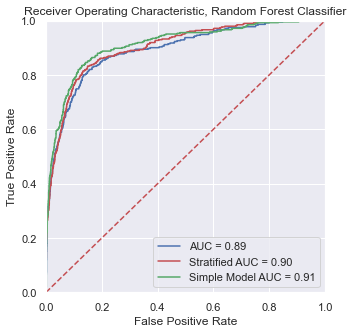

In [32]:
# Now lets compare our simplified model with our previous models:

X_train_simp, X_test_simp, y_train_simp, y_test_simp = train_test_split(X_simp, y_simp,stratify=y_simp, test_size=.2, shuffle=True, random_state=1)
clf_simp = RandomForestClassifier(max_depth=5, n_estimators=1000)

clf_simp.fit(X_train_simp,y_train_simp)
y_pred_simp = clf_simp.predict(X_test_simp)
y_prob_simp = clf_simp.predict_proba(X_test_simp)[:, 1]

fpr_simp, tpr_simp, threshold_strat = metrics.roc_curve(y_test_simp, y_prob_simp)
roc_auc_simp = metrics.auc(fpr_simp, tpr_simp)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.plot(fpr_simp, tpr_simp, 'g', label = 'Simple Model AUC = %0.2f' % roc_auc_simp)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
sns.set(rc={"figure.figsize":(5,5)})

All three models seem to have similar performance. 

#Approach 4 :
Balancing class with Randomover sampler method and building ML Models

In [33]:

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scaled = ss.fit_transform(X)

In [34]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x_scaled, y)
print(y.value_counts())
print("############")
print(y_ros.value_counts())

False    10422
True      1908
Name: Revenue, dtype: int64
############
True     10422
False    10422
Name: Revenue, dtype: int64


In [35]:
y = shopping.Revenue

In [36]:
X = x_ros
Y = y_ros

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 42,train_size = 0.8)


            Method Used  Accuracy
0   Logistic Regression  0.813864
1         Decision Tree  0.948909
2     RandomForest Gini  0.954186
3  RandomForest Entropy  0.953946
4        Support Vector  0.834972
5   K Nearest Neighbors  0.876469
6            GuassionNB  0.748141
7           BernoulliNB  0.786520
8     Voting Classifier  0.890621
AxesSubplot(0.125,0.125;0.775x0.755)


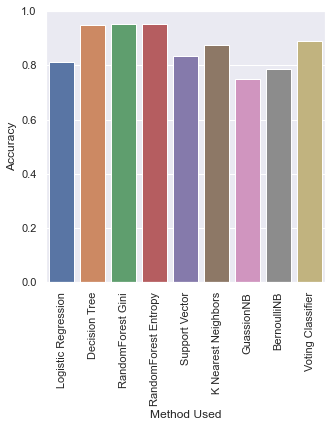

In [38]:
list_met = []
list_accuracy = []

# Model 1
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')
lr = classifier.fit(x_train, y_train)
# Prediction
y_pred = classifier.predict(x_test)
# Accuarcy
accuracy_LR = accuracy_score(y_test, y_pred)

# Model 2
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(random_state=14)
dt = classifier2.fit(x_train, y_train)
# prediction
y_pred2 = classifier2.predict(x_test)
# evaluation
accuracy_DT = accuracy_score(y_test, y_pred2)

# Model 3 
# criteria - gini
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(random_state=14)
rfi = classifier3.fit(x_train, y_train)
#prediction
y_pred3 = classifier3.predict(x_test)
# evaluation
accuracy_RFI = accuracy_score(y_test, y_pred3)

# Model 4
classifier4 = RandomForestClassifier(criterion='entropy', random_state=14)
rfe = classifier4.fit(x_train, y_train)
# predict
y_pred4 = classifier4.predict(x_test)
# evaluation
accuracy_RFE = accuracy_score(y_test, y_pred4)

# Model 5
from sklearn.svm import SVC

model_svm = SVC()
SVM = model_svm.fit(x_train, y_train)
#prediction
y_pred5 = model_svm.predict(x_test)
# evaluation
accuracy_SVC = accuracy_score(y_test, y_pred5)

# Model 6
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
knn = model_knn.fit(x_train, y_train)
#prediction
pred_knn = model_knn.predict(x_test)
# evaluation
accuracy_knn = accuracy_score(y_test, pred_knn)

# model 7
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)
# prediction
pred_gnb = gnb.predict(x_test)
# evaluation
accuracy_GNB = accuracy_score(y_test, pred_gnb)

# model 8
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
bnb = model.fit(x_train, y_train)
# prediction
pred_bnb = bnb.predict(x_test)
# evaluation
accuracy_BNB = accuracy_score(y_test, pred_bnb)

# combining all the above model by using voting classifier model

from sklearn.ensemble import VotingClassifier

evc = VotingClassifier(estimators = [('lr', lr), ('DT', dt), ('RFI', rfi),('RFE', rfe),
                                     ('SVC', SVM), ('KNN', knn),('GNB', gnb),
                                    ('BNB', bnb)], voting = 'hard',
                                    flatten_transform=True)
model_evc = evc.fit(x_train, y_train)
# prediction
pred_evc = evc.predict(x_test)
# evaluation
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ["Logistic Regression",'Decision Tree','RandomForest Gini', 'RandomForest Entropy',
        'Support Vector','K Nearest Neighbors','GuassionNB','BernoulliNB','Voting Classifier']

list2 = [accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_SVC,accuracy_knn,
        accuracy_GNB,accuracy_BNB, accuracy_evc]

list3 = [classifier,classifier2,classifier3,classifier4,model_svm,model_knn,
        gnb,model,model_evc]

df_accuracy = pd.DataFrame({'Method Used' :list1, "Accuracy" :list2})
print(df_accuracy)

charts = sns.barplot(x='Method Used', y = 'Accuracy', data=df_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

In [39]:

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.77      0.89      0.83      2062
        True       0.87      0.74      0.80      2107

    accuracy                           0.81      4169
   macro avg       0.82      0.81      0.81      4169
weighted avg       0.82      0.81      0.81      4169

[[1833  229]
 [ 547 1560]]


**Conclusion**

 By using a random forest classifier, we are able to achieve approximately 94% accuracy. If we were to deploy this model, the most efficient model to select would be our simple model. The simple model performs similarly to our other models, and only bases its classification by five features. 